# Perfect Plots
Python scripts to make pretty plots with matplotlib and other libraries

**Version 1.0**

By Dan Porter, PhD
Diamond Light Source Ltd.
2023

In [25]:
"""
Imports
"""
import sys, os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting

"""
matplotlib rc settings
"""
plt.rc('figure', figsize=(8, 6), dpi=100, autolayout=True)
plt.rc('lines', marker='o', color='r', linewidth=2, markersize=6)
plt.rc('errorbar', capsize=2)
plt.rc('legend', loc='best', frameon=False, fontsize=16)
plt.rc('axes', linewidth=2, titleweight='bold', labelsize='large')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.rc('axes.formatter', limits=(-3, 3), offset_threshold=6)
# Note font values appear to only be set when plt.show is called
plt.rc('font', family='serif', style='normal', weight='bold', size=16,
       serif=['Times New Roman', 'Times', 'DejaVu Serif'])
# plt.rcdefaults()



In [32]:
out = '    Python version: %s' % sys.version
out += '\n     numpy version: %s' % np.__version__
out += '\nmatplotlib version: %s' % matplotlib.__version__
print(out)

    Python version: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
     numpy version: 1.21.2
matplotlib version: 3.1.1


## Data

In [3]:
xdata = np.linspace(-180, 180, 100)
ydata = np.sin(np.radians(xdata))
ydata2 = np.cos(np.radians(xdata))
yerror = 0.1 * np.ones(len(ydata))


## Figure 1
Simple figure with single axis 

Text(0.5, 1.0, 'A Perfect Plot\n $y = \\sin(x)$')

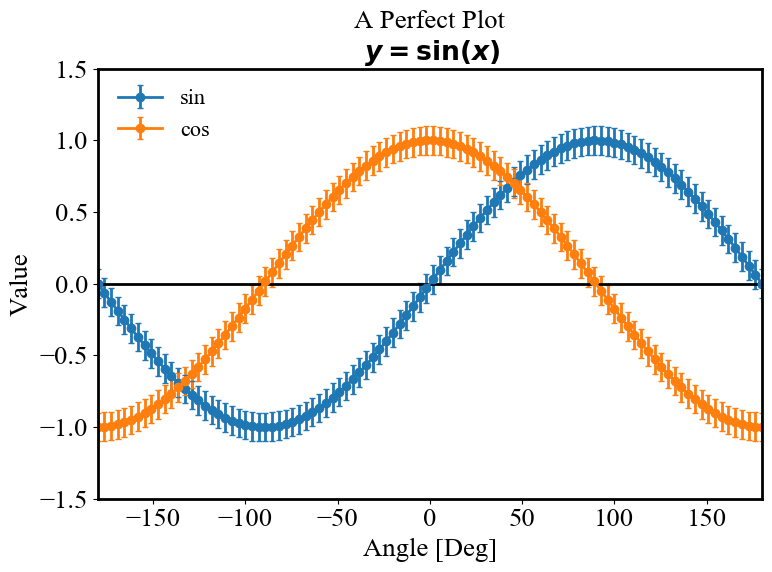

In [8]:
plt.figure()

plt.errorbar(xdata, ydata, yerror, label='sin')
plt.errorbar(xdata, ydata2, yerror, label='cos')

# Horizontal axis line
plt.axhline(0, color='k')

plt.xlim([-180, 180])
plt.ylim([-1.5, 1.5])

# axis labels
plt.legend()
plt.xlabel('Angle [Deg]')
plt.ylabel('Value')
plt.title('A Perfect Plot\n $y = \sin(x)$')


## Figure 2
Figure with 2 subplots + overlapping axes

Text(0, 0.5, '10*cos')

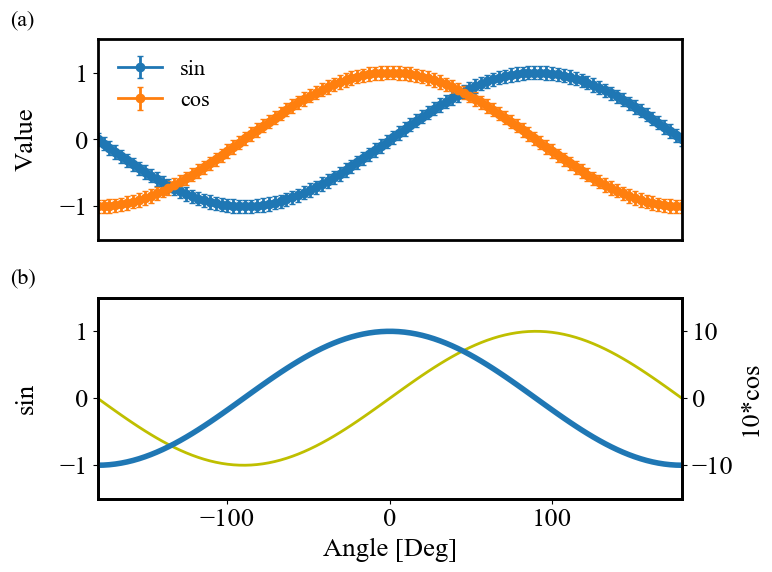

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

# Figure 1 - Subplot 1 - Axes 1
plt.sca(ax1)
plt.text(-0.15, 1.07, '(a)', transform=plt.gca().transAxes)

plt.errorbar(xdata, ydata, yerror, label='sin')
plt.errorbar(xdata, ydata2, yerror, label='cos')

plt.xlim([-180, 180])
plt.ylim([-1.5, 1.5])

plt.legend()
plt.ylabel('Value')
plt.gca().get_yaxis().set_label_coords(-0.10, 0.5)

# plt.subplots_adjust(left=0.25)
plt.xticks([])  # No xticks on top figure

# Figure 1 - Subplot 2 - Axes 1
plt.sca(ax2)
plt.text(-0.15, 1.07, '(b)', transform=plt.gca().transAxes)

plt.plot(xdata, ydata, 'y-', label='sin')

plt.xlim([-180, 180])
plt.ylim([-1.5, 1.5])

plt.xlabel('Angle [Deg]')
plt.ylabel('sin')
plt.gca().get_yaxis().set_label_coords(-0.10, 0.5)

# Figure 1 - Subplot 2 - Axes 2
ax2b = ax2.twinx()  # Create axis ontop of ax2
plt.plot(xdata, ydata2 * 10, '-', ms=12, lw=4, label='sin')

plt.xlim([-180, 180])
plt.ylim([-15, 15])

plt.ylabel('10*cos')

## Figure 3
Figure with colormapped plots

Text(0.5, 1.0, 'viridis')

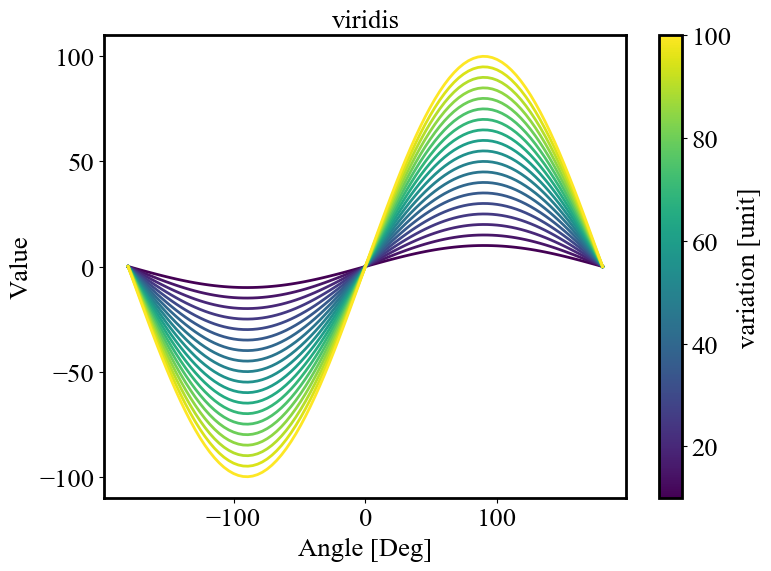

In [6]:
plt.figure()

# Colormaps: http://matplotlib.org/users/colormaps.html
cmap_name = 'viridis'
cm = plt.get_cmap(cmap_name)
# Note: cm(n) = (r,g,b,a)
#  if n = int, n = 0:255
#  if n = float, n = 0:1

datarange = np.arange(10, 101, 5, dtype=float)
colrange = (datarange - datarange[0]) / (datarange[-1] - datarange[0])
for n in range(len(datarange)):
    col = cm(colrange[n])  # add a small number here to keep values away from minimum colormap (white for hot_r)
    plt.plot(xdata, datarange[n] * ydata, '-', lw=2, color=col,
             label='%3.0f (%5.2f,%5.2f,%5.2f,%5.2f)' % (datarange[n], col[0], col[1], col[2], col[3]))

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cm)
sm.set_array(datarange)
cbar = plt.colorbar(sm)
cbar.set_label('variation [unit]')

plt.xlabel('Angle [Deg]')
plt.ylabel('Value')
plt.title('%s' % cmap_name)


## Figure 4
3D Plot

<Figure size 800x600 with 0 Axes>

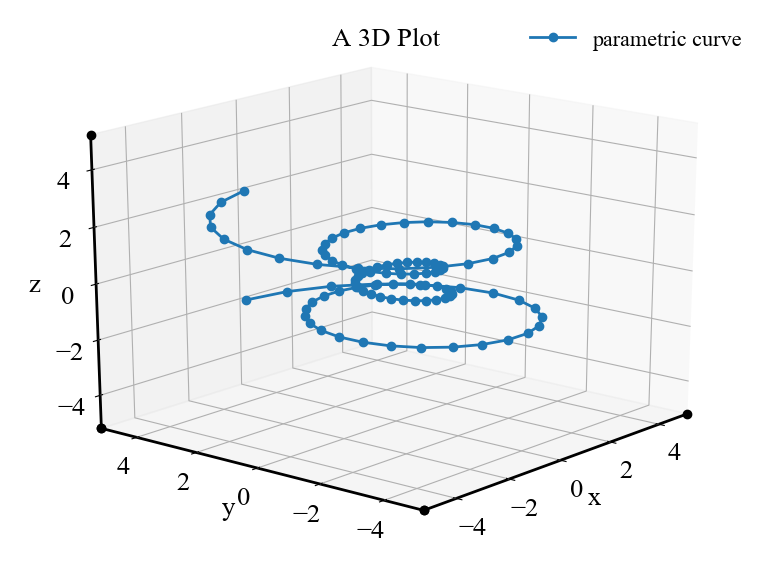

In [13]:
fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z ** 2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)


ax.plot(x, y, z, label='parametric curve')
ax.view_init(elev=20, azim=220)
ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('A 3D Plot')
ax.legend()


## Figure 5
Figure with pcolormesh

In [15]:
# Data
x = np.arange(-2, 2, 0.01)
y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(x, y)
print('Meshgrid:')
print('X[:,0]: %s' % X[:, 0])
print('X[0,:]: %s' % X[0, :])
print('X.flatten()[:30] = %s' % X.flatten()[:30])
print('Y.flatten()[:30] = %s' % Y.flatten()[:30])
Z = 1 / (X ** 2 + Y ** 2)


Meshgrid:
X[:,0]: [-2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.]
X[0,:]: [-2.00000000e+00 -1.99000000e+00 -1.98000000e+00 -1.97000000e+00
 -1.96000000e+00 -1.95000000e+00 -1.94000000e+00 -1.93000000e+00
 -1.92000000e+00 -1.91000000e+00 -1.90000000e+00 -1.89000000e+00
 -1.88000000e+00 -1.87000000e+00 -1.86000000e+00 -1.85000000e+00
 -1.84000000e+00 -1.83000000e+00 -1.82000000e+00 -1.81000000e+00
 -1.80000000e+00 -1.79000000e+00 -1.78000000e+00 -1.77000000e+00
 -1.76000000e+00 -1.75000000e+00 -1.74000000e+00 -1.73000000e+00
 -1.72000000e+00 -1.71000000e+0

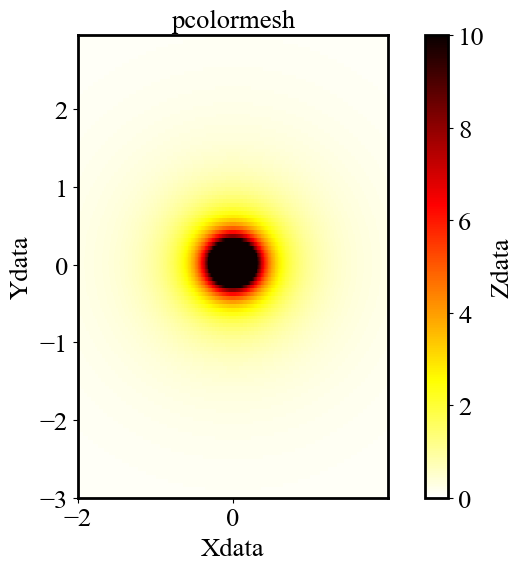

In [16]:
plt.figure()
plt.pcolormesh(X, Y, Z, cmap='hot_r')
plt.axis('image')
plt.clim([0, 10])
cb = plt.colorbar()
plt.xlabel('Xdata')
plt.ylabel('Ydata')
plt.title('pcolormesh')
cb.set_label('Zdata')

## Figure 6
Publication style figure with inset axes

(array([-4., -2.,  0.,  2.,  4.]), <a list of 5 Text yticklabel objects>)

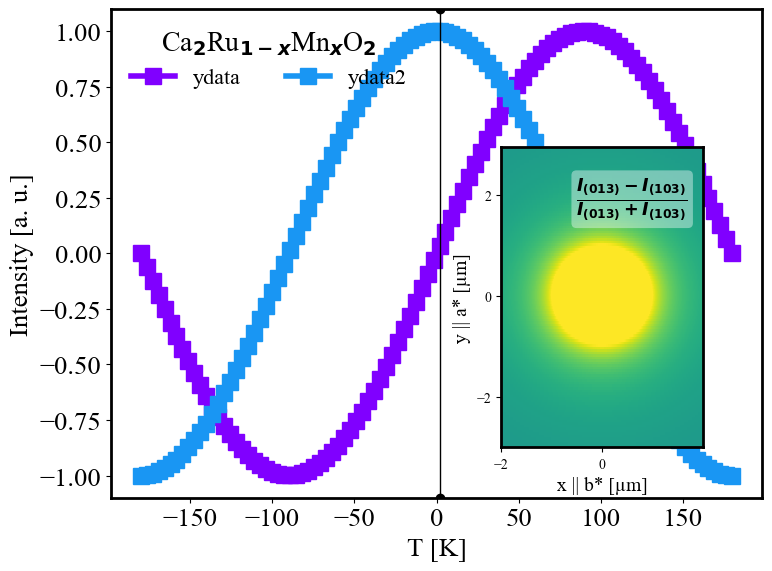

In [24]:
cmap = plt.get_cmap('rainbow')
cols = cmap(np.linspace(0, 1, 6))

plt.figure()
plt.plot(xdata, ydata, 's-', ms=12, lw=4, c=cols[0], label='ydata')
plt.plot(xdata, ydata2, 's-', ms=12, lw=4, c=cols[1], label='ydata2')

plt.axvline(xdata[50], marker=None, c='k', lw=1)
plt.legend(loc=2, frameon=False, fontsize=16, ncol=2, title='Ca$_2$Ru$_{1-x}$Mn$_{x}$O$_2$', title_fontsize=20)
plt.xlabel('T [K]')
plt.ylabel('Intensity [a. u.]')


# Inset axes
plt.axes([0.62, 0.23, 0.3, 0.5])
plt.pcolormesh(X, Y, Z)
plt.axis('image')
plt.clim([-1, 1])
plt.text(0.65, 0.8, '$\\frac{I_{(013)} - I_{(103)}}{I_{(013)} + I_{(103)}}$',
         transform=plt.gca().transAxes,
         ha='center',
         fontsize=18,
         fontname='Times New Roman',
         bbox=dict(facecolor='white', alpha=0.4, edgecolor='none', pad=0.2, boxstyle='round'),
         )
plt.xlabel('x || b* [\u00b5m]', fontsize=14, fontweight='bold', fontname='Times New Roman')
plt.ylabel('y || a* [\u00b5m]', fontsize=14, fontweight='bold', fontname='Times New Roman')
# plt.gca().get_yaxis().set_label_coords(-0.10,0.5)
plt.xticks(fontsize=10, fontname='Times New Roman')
plt.yticks(fontsize=10, fontname='Times New Roman')